# Change in binary inclination due to natal kicks

In [1]:
%load_ext autoreload
%autoreload 2

import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
from matplotlib import colors
from matplotlib import patheffects
import numpy as np

import biaswise

warnings.filterwarnings("ignore")

plt.style.use('../config/style.mpl')

### Binary conditions at core-collapse

In [2]:
m1 = 5
m1_c_core_mass = 4
m1_remnant_mass = 1.4
m1_fallback_fraction = 0.0
m2 = 15
Porbs = [5, 50, 500]

## Plots

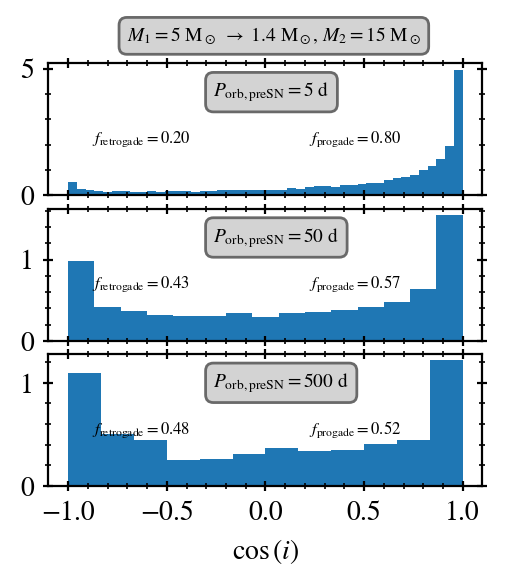

In [3]:
plt.style.use('../config/style.mpl')
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(2.8, 2.8), sharex=True,
                       gridspec_kw={'height_ratios': [1.2,1.2,1.2], 'hspace': 0.1})

# Binary conditions at core-collapse
axs[0].annotate('$M_1 = {}$ M$_\\odot$ $\\rightarrow$ {} M$_\\odot$, $M_2 = {}$ M$_\\odot$'.format(m1, m1_remnant_mass, m2),
    xy=(0.25, 0.93), fontsize=7, xycoords='figure fraction',
    bbox=dict(facecolor='lightgray', edgecolor='dimgray', boxstyle='round, pad=0.4'))

for k,P in enumerate(Porbs):
    
    # Load binary system into kick module
    binary = biaswise.binary.BinarySystem(m1=m1, m1_core_mass=m1_c_core_mass,
                m1_remnant_mass=m1_remnant_mass,
                m1_fallback_fraction=m1_fallback_fraction, m2=m2, P=P)
    
    # Orbital period preSN
    axs[k].annotate('$P_{} = {}$ d'.format('{\\rm orb, preSN}', P), xy=(0.38, 0.75),
            bbox=dict(facecolor='lightgray', edgecolor='dimgray', boxstyle='round, pad=0.4'),
            fontsize=7, xycoords='axes fraction')

    # define type of distribution of natal kicks & compute them
    binary.set_natal_kick_distribution(n_trials=100000, distribution_id='Maxwell',
            kick_scaling=lambda x: (1-binary.m1_fallback_fraction)*x)
    binary.get_natal_kick_distribution()

    # compute orbital parameters & make a grid out of them
    binary.get_orbital_distribution(verbose=False)
    binary.get_post_kick_grid(use_unbounded_for_norm=False, verbose=False)
    
    mask = binary.cosi > 0
    f_prog = len(binary.cosi[mask]) / len(binary.cosi)
    f_ret = len(binary.cosi[~mask]) / len(binary.cosi)

    # plot distribution of kicks
    binary.plot_kick_distribution(xattr='cos_i', fig=fig, ax=axs[k], density=True,
            show=False)
    
    # Text on fractions
    text = '$f_{} = {:.2f}$'.format('{\\rm retrogade}', f_ret)
    axs[k].annotate(text, xy=(0.1, 0.4), fontsize=6, xycoords='axes fraction')
    text = '$f_{} = {:.2f}$'.format('{\\rm progade}', f_prog)
    axs[k].annotate(text, xy=(0.6, 0.4), fontsize=6, xycoords='axes fraction')

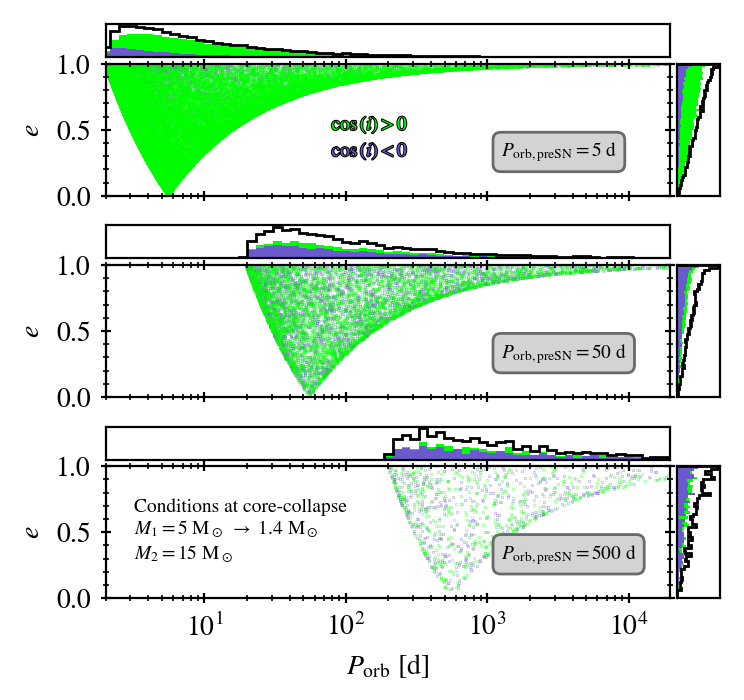

In [6]:
plt.style.use('../config/style.mpl')
fig, axs = plt.subplots(figsize=(4.1, 3.8))

gs = grd.GridSpec(8, 3, figure=fig, height_ratios=[1,4,0.5,1,4,0.5,1,4], width_ratios=[4,0.3,0.1], wspace=0.035, hspace=0.1)

axarr = [plt.subplot(gs[0]), # plt.subplot(gs[1]), plt.subplot(gs[2]),
         plt.subplot(gs[3]), plt.subplot(gs[4]), # plt.subplot(gs[5]),
         # plt.subplot(gs[6]), plt.subplot(gs[7]), plt.subplot(gs[8]),
         plt.subplot(gs[9]), # plt.subplot(gs[10]), plt.subplot(gs[11]),
         plt.subplot(gs[12]), plt.subplot(gs[13]), # plt.subplot(gs[14]),
         # plt.subplot(gs[15]), plt.subplot(gs[16]), plt.subplot(gs[17]),
         plt.subplot(gs[18]), # plt.subplot(gs[19]), plt.subplot(gs[20]),
         plt.subplot(gs[21]), plt.subplot(gs[22]), # plt.subplot(gs[23])
        ]

xmin, xmax = 2, 0
for k,P in enumerate(Porbs):

    # Load binary system into kick module
    binary = biaswise.binary.BinarySystem(m1=m1, m1_core_mass=m1_c_core_mass,
                m1_remnant_mass=m1_remnant_mass,
                m1_fallback_fraction=m1_fallback_fraction, m2=m2, P=P)
    
    # Orbital period preSN
    axarr[3*k+1].annotate('$P_{} = {}$ d'.format('{\\rm orb, preSN}', P), xy=(0.7, 0.3),
            bbox=dict(facecolor='lightgray', edgecolor='dimgray', boxstyle='round, pad=0.4'),
            fontsize=7, xycoords='axes fraction')

    # define type of distribution of natal kicks & compute them
    binary.set_natal_kick_distribution(n_trials=100000, distribution_id='Maxwell',
            kick_scaling=lambda x: (1-binary.m1_fallback_fraction)*x)
    binary.get_natal_kick_distribution()

    # compute orbital parameters & make a grid out of them
    binary.get_orbital_distribution(verbose=False)
    binary.get_post_kick_grid(use_unbounded_for_norm=False, verbose=False)
    
    if binary.P_post_grid[0] < xmin: xmin = binary.P_post_grid[0]
    if binary.P_post_grid[-1] > xmax: xmax = binary.P_post_grid[-1]
    
    # create mask on orbit inclination
    mask_prog = binary.cosi >= 0

    # plot distribution of kicks
    axarr[3*k+1].scatter(binary.P_post[~mask_prog], binary.e_post[~mask_prog], s=0.01, c='slateblue')
    axarr[3*k+1].scatter(binary.P_post[mask_prog], binary.e_post[mask_prog], s=0.01, c='lime')
    # norm = colors.Normalize(vmin=-1, vmax=1)
    # mpl.colorbar.ColorbarBase(axarr[4*k+3], norm=norm, orientation='vertical')
    
    # histograms
    logbins = np.logspace(-1, 5, 100)
    axarr[3*k].hist(binary.P_post, density=False, bins=logbins, histtype='step', facecolor='white', edgecolor='black')
    axarr[3*k].hist(binary.P_post[mask_prog], density=False, bins=logbins, color='lime')
    axarr[3*k].hist(binary.P_post[~mask_prog], density=False, bins=logbins, color='slateblue')
    axarr[3*k+2].hist(binary.e_post, bins=50, density=False, range=(0,1), orientation='horizontal',
                      histtype='step', facecolor='white', edgecolor='black')
    axarr[3*k+2].hist(binary.e_post[mask_prog], bins=50, density=False, range=(0,1), orientation='horizontal',
                      color='lime')
    axarr[3*k+2].hist(binary.e_post[~mask_prog], bins=50, density=False, range=(0,1), orientation='horizontal',
                      color='slateblue')
    
for k in range(3):
    axarr[3*k].set_xscale('log')
    axarr[3*k+1].set_xscale('log')
    axarr[3*k].set_xlim([xmin, xmax])
    axarr[3*k+1].set_xlim([xmin, xmax])
    axarr[3*k+1].set_ylim([0,1])
    axarr[3*k+2].set_ylim([0,1])
    
    axarr[3*k+1].set_ylabel('$e$')
    # axarr[4*k+3].set_ylabel('$\\cos\\,(i)$')
    
    if k == 0 or k == 1: axarr[3*k+1].set_xticklabels([])

for ax in [axarr[0], axarr[2], axarr[3], axarr[5], axarr[6], axarr[8]]:
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.minorticks_off()

axarr[-2].set_xlabel('$P_{\\rm orb}$ [d]')

# Binary conditions at core-collapse
msg = 'Conditions at core-collapse \n$M_1 = {}$ M$_\\odot$ $\\rightarrow$ {} M$_\\odot$ \n$M_2 = {}$ M$_\\odot$'.format(m1, m1_remnant_mass, m2)
axarr[-2].annotate(msg, xy=(0.05, 0.3), fontsize=7, xycoords='axes fraction')

axarr[1].annotate('$\\cos\\,(i) > 0$', xy=(0.4, 0.5), fontsize=7, xycoords='axes fraction', color='lime',
                  path_effects=[patheffects.withStroke(linewidth=0.75, foreground='black')])
axarr[1].annotate('$\\cos\\,(i) < 0$', xy=(0.4, 0.3), fontsize=7, xycoords='axes fraction', color='slateblue',
                  path_effects=[patheffects.withStroke(linewidth=0.75, foreground='black')]);